Data Scientist Workshop - ex.6.1 - Adam Trentowski, 162602


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

Load the Dataset

In [2]:
dataset = pd.read_csv('D:/Projekty/DataScientistWorkshop/lab_09/files/wine.csv')

In [3]:
dataset.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
X = dataset.loc[:, ['Alcohol', 'Phenols']].values
y = dataset.loc[:, 'Wine'].values

Split dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Scaling

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVM Fitting, Predicting - RBF

In [7]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [8]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 2, 1, 1, 2, 1, 2, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 3, 2, 3, 1, 1, 2, 3,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 1], dtype=int64)

In [9]:
y_pred = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [10]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[40  0  0]
 [ 3 39  7]
 [ 1  4 30]]


0.8790322580645161

In [11]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
accuracy_score(y_test, y_pred_test)

[[19  0  0]
 [ 2 18  2]
 [ 1  1 11]]


0.8888888888888888

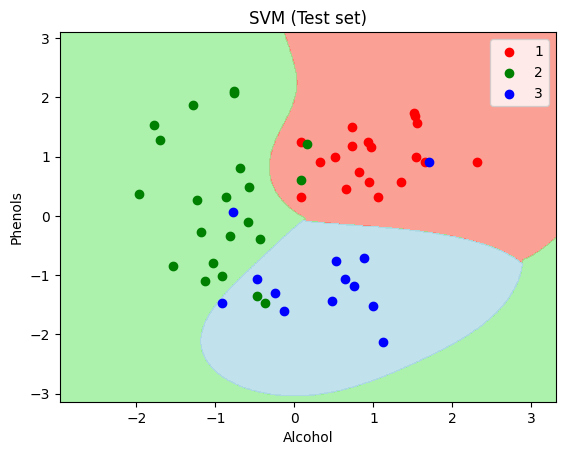

In [14]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(['salmon', 'lightgreen', 'lightblue']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(['red', 'green', 'blue'])(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()

# SVM Fitting, Predicting - Linear

In [16]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [17]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 1, 1, 1, 2, 1, 2, 2, 2, 3, 3, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 3, 2, 3, 1, 1, 2, 3,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 1], dtype=int64)

In [18]:
y_pred = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [19]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[38  2  0]
 [ 4 38  7]
 [ 1  5 29]]


0.8467741935483871

In [20]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
accuracy_score(y_test, y_pred_test)

[[19  0  0]
 [ 4 16  2]
 [ 1  1 11]]


0.8518518518518519

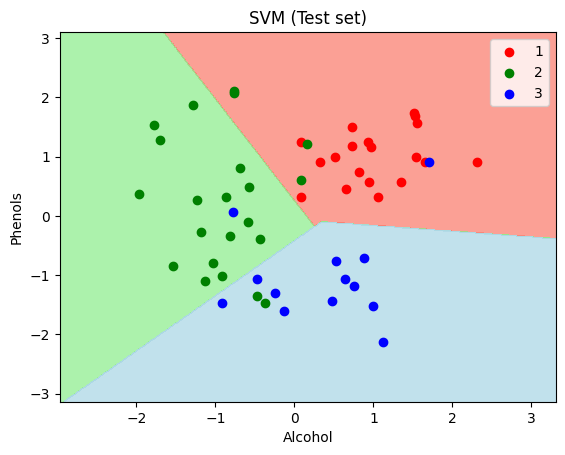

In [21]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(['salmon', 'lightgreen', 'lightblue']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(['red', 'green', 'blue'])(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()

# SVM Fitting, Predicting - Sigmoid

In [22]:
classifier = SVC(kernel='sigmoid', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [23]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 1, 1, 3, 2, 1, 1, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 3, 2, 3, 1, 1, 2, 3,
       2, 1, 3, 1, 3, 1, 3, 3, 1, 1], dtype=int64)

In [24]:
y_pred = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [25]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[37  3  0]
 [ 3 36 10]
 [ 1  4 30]]


0.8306451612903226

In [26]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
accuracy_score(y_test, y_pred_test)

[[18  1  0]
 [ 6 14  2]
 [ 1  1 11]]


0.7962962962962963

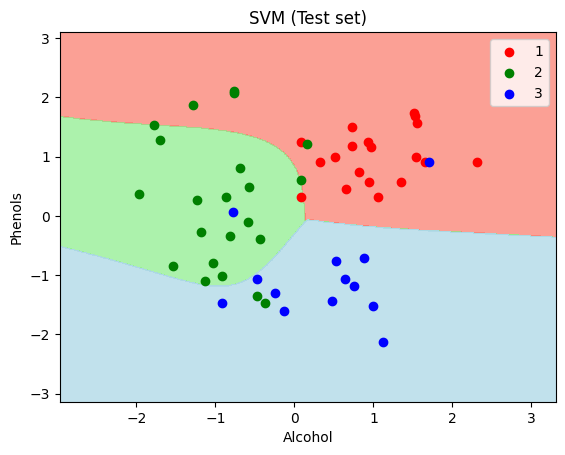

In [27]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(['salmon', 'lightgreen', 'lightblue']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(['red', 'green', 'blue'])(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()

# SVM Fitting, Predicting - Poly

In [30]:
classifier = SVC(kernel='poly', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [31]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 2, 1, 2, 2, 1, 2, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2, 3, 3, 2, 3, 2, 1, 2, 3,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 1], dtype=int64)

In [32]:
y_pred = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [33]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[28 12  0]
 [ 2 42  5]
 [ 0 11 24]]


0.7580645161290323

In [34]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
accuracy_score(y_test, y_pred_test)

[[15  4  0]
 [ 0 20  2]
 [ 1  1 11]]


0.8518518518518519

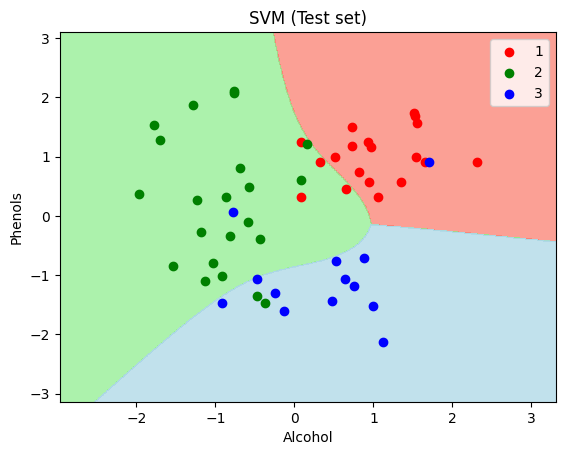

In [35]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(['salmon', 'lightgreen', 'lightblue']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(['red', 'green', 'blue'])(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()

### RBF
Train acc = 88%
Test acc = 89%

The model is overfitted.

### Linear
Train acc = 85%
Test acc = 85%

The model is overfitted.

### Sigmoid
Train acc = 83%
Test acc = 80%

The model is well-fitted.

### Poly
Train acc = 76%
Test acc = 85%

The model is overfitted.

The SVM model with a sigmoid kernel is the one that is well-fitted and does not exhibit overfitting.